In [254]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [613]:
df2=pd.read_csv('broadway.csv')

In [541]:
df2.columns

Index(['Attendance', 'Capacity', 'Day', 'Full', 'Gross', 'Gross Potential',
       'Month', 'Name', 'Performances', 'Theatre', 'Type', 'Year'],
      dtype='object')

In [546]:
(df2['Year'].unique())

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

In [116]:
import string
import time
import re
import datetime
import pandas as pd
import numpy as np
import urllib
import requests
from bs4 import BeautifulSoup
import datetime


In [80]:
from bs4 import BeautifulSoup
import requests
import urllib.request
import re

def getLinks_tagged_fast(url, tag):
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc, 'html.parser')
    links = []
    # set the opening of each link to be...
    tag = tag
    for link in soup.findAll('a', attrs={'href': re.compile(tag)}):
        links.append(link.get('href'))
    return links

In [44]:
getLinks_tagged_fast("https://www.broadwayworld.com/grossesbyshow.cfm?letter=", 'a')

['/aroundtheworld/',
 '/off-broadway/',
 '/aroundtheworld/',
 '/national-tours/',
 '/birmingham/',
 '/anchorage/',
 '/costa-mesa/',
 '/los-angeles/',
 '/palm-springs/',
 '/sacramento/',
 '/san-diego/',
 '/san-francisco/',
 '/santa-barbara/',
 '/thousand-oaks/',
 '/delaware/',
 '/miami/',
 '/fort-lauderdale/',
 '/ft-myers-naples/',
 '/jacksonville/',
 '/orlando/',
 '/palm-beach/',
 '/tallahassee/',
 '/tampa/',
 '/atlanta/',
 '/hawaii/',
 '/chicago/',
 '/indianapolis/',
 '/wichita/',
 '/new-orleans/',
 '/maine/',
 '/baltimore/',
 '/minneapolis/',
 '/jackson/',
 '/kansas-city/',
 '/montana/',
 '/omaha/',
 '/new-hampshire/',
 '/las-vegas/',
 '/albuquerque/',
 '/buffalo/',
 '/central-new-york/',
 '/long-island/',
 '/rockland/',
 '/rockland/',
 '/charlotte/',
 '/raleigh/',
 '/fargo/',
 '/cincinnati/',
 '/cleveland/',
 '/dayton/',
 '/oklahoma/',
 '/tulsa/',
 '/portland/',
 '/central-pa/',
 '/philadelphia/',
 '/rhode-island/',
 '/south-carolina/',
 '/sioux-falls/',
 '/nashville/',
 '/austin/',

In [112]:
def get_gross_pages(url_base):
    show_links_nested = []
    tag = 'https://www.broadwayworld.com/grosses/'
    page_base = url_base
    abc = list(string.ascii_lowercase)
    abc.append('1')
    list_loop_az =[]
    for a in abc:
        list_loop_az.append(page_base+a)

    for page in list_loop_az:
        show_links_nested.append(getLinks_tagged_fast(page, tag))
        show_links = sum(show_links_nested, [])
    
    return show_links

In [113]:
show_links=get_gross_pages("https://www.broadwayworld.com/grossesbyshow.cfm?letter=")

In [278]:
len(show_links)

1206

In [165]:
show_names=[]
for link in show_links:
    show_names.append(link.replace('https://www.broadwayworld.com/grosses/',''))
show_names[0:6]

['A-BEHANDING-IN-SPOKANE',
 'A-BRONX-TALE',
 'A-BRONX-TALE-THE-MUSICAL',
 'A-CATERED-AFFAIR',
 'A-CHANGE-IN-THE-HEIR',
 'A-CHORUS-LINE']

In [171]:
gross_links=[]
for name in show_names:
    url='https://www.broadwayworld.com/grossesshow.cfm?show={}&year=2019&allall=on'.format(name)
    gross_links.append(url)
gross_links[0:10]

['https://www.broadwayworld.com/grossesshow.cfm?show=A-BEHANDING-IN-SPOKANE&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-BRONX-TALE&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-BRONX-TALE-THE-MUSICAL&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CATERED-AFFAIR&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CHANGE-IN-THE-HEIR&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CHORUS-LINE&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-Chorus-Line-Original&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CHRISTMAS-CAROL&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CHRISTMAS-STORY&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CLASS-ACT&year=2019&allall=on']

In [229]:
df=pd.read_html(gross_links[0])[4:][0]

In [230]:
df.head()

0   1                 2         3               4                  5   \
0     Week   #  This Week'sGross    Diff $  PotentialGross  Gross % Potential   
1  2/21/10   8          $455,335  $455,335        $933,200             48.79%   
2  2/28/10   9          $413,686  $-41,649        $933,200             44.33%   
3  3/07/10  10          $432,187   $18,501        $933,200             46.31%   
4  3/14/10  11          $554,397  $122,210        $940,690             58.94%   

         6           7          8           9    10         11      12  
0  Avg.Paid  Top Ticket  SeatsSold  TotalSeats  Per  This Week  Diff %  
1    $62.03     $200.00       7340        8568    8      85.7%      0%  
2    $60.16     $200.00       6876        8568    8      80.3%   80.3%  
3    $55.95     $200.00       7725        8568    8      90.2%    9.9%  
4    $74.69     $200.00       7423        8568    8      86.6%   -3.6%

In [232]:
df = df.drop(df.index[0])
cols = ['Week','Week_Numer', 'Gross', 'Gross_Diff', 'Pot_Gross',
        'Potential_Gross_Percent','Average_Paid_Ticket', 'Top_Ticket','Seats_Sold',
        'Total_Seats', 'Performances','Capacity', 'Capacity_Diff']
df.columns = cols
df

Week Week_Numer       Gross Gross_Diff       Pot_Gross  \
2          2/28/10          9    $413,686   $-41,649        $933,200   
3          3/07/10         10    $432,187    $18,501        $933,200   
4          3/14/10         11    $554,397   $122,210        $940,690   
5          3/21/10         12    $539,372   $-15,025        $940,690   
6          3/28/10         13    $489,726   $-49,646        $940,690   
7          4/04/10         14    $524,859    $35,133        $940,690   
8          4/11/10         15    $489,587   $-35,272        $940,690   
9          4/18/10         16    $402,160   $-87,427        $940,690   
10         4/25/10         17    $415,523    $13,363        $940,690   
11         5/02/10         18    $384,849   $-30,674        $940,690   
12         5/09/10         19    $414,898    $30,049        $940,690   
13         5/16/10         20    $432,442    $17,544        $940,690   
14         5/23/10         21    $442,947    $10,505        $940,690   
15         5/30/10         22    $428,934   $-14,013        $940,690   
16         6/06/10         23    $483,113    $54,179        $940,690   
17            Week          #     Grosses     Diff $  PotentialGross   
18  TOTAL FOR YEAR        NaN  $7,304,015        NaN             NaN   

   Potential_Gross_Percent Average_Paid_Ticket    Top_Ticket Seats_Sold  \
2                   44.33%              $60.16       $200.00       6876   
3                   46.31%              $55.95       $200.00       7725   
4                   58.94%              $74.69       $200.00       7423   
5                   57.34%              $77.34       $200.00       6974   
6                   52.06%              $78.78       $200.00       6216   
7                   55.80%              $76.87       $200.00       6828   
8                   52.05%              $75.74       $200.00       6464   
9                   42.75%              $75.52       $200.00       5325   
10                  44.17%              $74.86       $200.00       5551   
11                  40.91%              $69.40       $200.00       5545   
12                  44.11%              $73.17       $200.00       5670   
13                  45.97%              $74.30       $200.00       5820   
14                  47.09%              $71.03       $200.00       6236   
15                  45.60%              $72.26       $200.00       5936   
16                  51.36%              $77.40       $200.00       6242   
17    Gross % of Potential            Avg.Paid    Top Ticket  SeatsSold   
18             48.60% AVG.         $71.84 AVG.  $200.00 AVG.     102171   

   Total_Seats Performances     Capacity Capacity_Diff  
2         8568            8        80.3%         80.3%  
3         8568            8        90.2%          9.9%  
4         8568            8        86.6%         -3.6%  
5         8568            8        81.4%         -5.2%  
6         8568            8        72.5%         -8.9%  
7         8568            8        79.7%          7.2%  
8         8568            8        75.4%         -4.3%  
9         8568            8        62.1%        -13.3%  
10        8568            8        64.8%          2.7%  
11        8568            8        64.7%         -0.1%  
12        8568            8        66.2%          1.5%  
13        8568            8        67.9%          1.7%  
14        8568            8        72.8%          4.9%  
15        8568            8        69.3%         -3.5%  
16        8568            8        72.9%          3.6%  
17  TotalSeats          Per  This Week %        Diff %  
18      137088          128   74.53%AVG.           NaN

In [233]:
df = df[:-2]
df

Week Week_Numer     Gross Gross_Diff Pot_Gross Potential_Gross_Percent  \
2   2/28/10          9  $413,686   $-41,649  $933,200                  44.33%   
3   3/07/10         10  $432,187    $18,501  $933,200                  46.31%   
4   3/14/10         11  $554,397   $122,210  $940,690                  58.94%   
5   3/21/10         12  $539,372   $-15,025  $940,690                  57.34%   
6   3/28/10         13  $489,726   $-49,646  $940,690                  52.06%   
7   4/04/10         14  $524,859    $35,133  $940,690                  55.80%   
8   4/11/10         15  $489,587   $-35,272  $940,690                  52.05%   
9   4/18/10         16  $402,160   $-87,427  $940,690                  42.75%   
10  4/25/10         17  $415,523    $13,363  $940,690                  44.17%   
11  5/02/10         18  $384,849   $-30,674  $940,690                  40.91%   
12  5/09/10         19  $414,898    $30,049  $940,690                  44.11%   
13  5/16/10         20  $432,442    $17,544  $940,690                  45.97%   
14  5/23/10         21  $442,947    $10,505  $940,690                  47.09%   
15  5/30/10         22  $428,934   $-14,013  $940,690                  45.60%   
16  6/06/10         23  $483,113    $54,179  $940,690                  51.36%   

   Average_Paid_Ticket Top_Ticket Seats_Sold Total_Seats Performances  \
2               $60.16    $200.00       6876        8568            8   
3               $55.95    $200.00       7725        8568            8   
4               $74.69    $200.00       7423        8568            8   
5               $77.34    $200.00       6974        8568            8   
6               $78.78    $200.00       6216        8568            8   
7               $76.87    $200.00       6828        8568            8   
8               $75.74    $200.00       6464        8568            8   
9               $75.52    $200.00       5325        8568            8   
10              $74.86    $200.00       5551        8568            8   
11              $69.40    $200.00       5545        8568            8   
12              $73.17    $200.00       5670        8568            8   
13              $74.30    $200.00       5820        8568            8   
14              $71.03    $200.00       6236        8568            8   
15              $72.26    $200.00       5936        8568            8   
16              $77.40    $200.00       6242        8568            8   

   Capacity Capacity_Diff  
2     80.3%         80.3%  
3     90.2%          9.9%  
4     86.6%         -3.6%  
5     81.4%         -5.2%  
6     72.5%         -8.9%  
7     79.7%          7.2%  
8     75.4%         -4.3%  
9     62.1%        -13.3%  
10    64.8%          2.7%  
11    64.7%         -0.1%  
12    66.2%          1.5%  
13    67.9%          1.7%  
14    72.8%          4.9%  
15    69.3%         -3.5%  
16    72.9%          3.6%

In [255]:
df['Show_Name'] =gross_links[0].replace('https://www.broadwayworld.com/grossesshow.cfm?show=','').replace('&year=2019&allall=on','').replace('-',' ').title()

In [260]:
df.reset_index(drop=True)

Week Week_Numer     Gross Gross_Diff Pot_Gross Potential_Gross_Percent  \
0   2/28/10          9  $413,686   $-41,649  $933,200                  44.33%   
1   3/07/10         10  $432,187    $18,501  $933,200                  46.31%   
2   3/14/10         11  $554,397   $122,210  $940,690                  58.94%   
3   3/21/10         12  $539,372   $-15,025  $940,690                  57.34%   
4   3/28/10         13  $489,726   $-49,646  $940,690                  52.06%   
5   4/04/10         14  $524,859    $35,133  $940,690                  55.80%   
6   4/11/10         15  $489,587   $-35,272  $940,690                  52.05%   
7   4/18/10         16  $402,160   $-87,427  $940,690                  42.75%   
8   4/25/10         17  $415,523    $13,363  $940,690                  44.17%   
9   5/02/10         18  $384,849   $-30,674  $940,690                  40.91%   
10  5/09/10         19  $414,898    $30,049  $940,690                  44.11%   
11  5/16/10         20  $432,442    $17,544  $940,690                  45.97%   
12  5/23/10         21  $442,947    $10,505  $940,690                  47.09%   
13  5/30/10         22  $428,934   $-14,013  $940,690                  45.60%   
14  6/06/10         23  $483,113    $54,179  $940,690                  51.36%   

   Average_Paid_Ticket Top_Ticket Seats_Sold Total_Seats Performances  \
0               $60.16    $200.00       6876        8568            8   
1               $55.95    $200.00       7725        8568            8   
2               $74.69    $200.00       7423        8568            8   
3               $77.34    $200.00       6974        8568            8   
4               $78.78    $200.00       6216        8568            8   
5               $76.87    $200.00       6828        8568            8   
6               $75.74    $200.00       6464        8568            8   
7               $75.52    $200.00       5325        8568            8   
8               $74.86    $200.00       5551        8568            8   
9               $69.40    $200.00       5545        8568            8   
10              $73.17    $200.00       5670        8568            8   
11              $74.30    $200.00       5820        8568            8   
12              $71.03    $200.00       6236        8568            8   
13              $72.26    $200.00       5936        8568            8   
14              $77.40    $200.00       6242        8568            8   

   Capacity Capacity_Diff               Show_Name  
0     80.3%         80.3%  A Behanding In Spokane  
1     90.2%          9.9%  A Behanding In Spokane  
2     86.6%         -3.6%  A Behanding In Spokane  
3     81.4%         -5.2%  A Behanding In Spokane  
4     72.5%         -8.9%  A Behanding In Spokane  
5     79.7%          7.2%  A Behanding In Spokane  
6     75.4%         -4.3%  A Behanding In Spokane  
7     62.1%        -13.3%  A Behanding In Spokane  
8     64.8%          2.7%  A Behanding In Spokane  
9     64.7%         -0.1%  A Behanding In Spokane  
10    66.2%          1.5%  A Behanding In Spokane  
11    67.9%          1.7%  A Behanding In Spokane  
12    72.8%          4.9%  A Behanding In Spokane  
13    69.3%         -3.5%  A Behanding In Spokane  
14    72.9%          3.6%  A Behanding In Spokane

In [280]:
df

Week Week_Numer    Gross Gross_Diff Pot_Gross Potential_Gross_Percent  \
1  4/15/90         15  $20,776    $20,776        $0                     NaN   
2  4/22/90         16  $16,909    $-3,867        $0                     NaN   
3  4/29/90         17  $29,921    $13,012        $0                     NaN   
4  5/06/90         18  $13,761   $-16,160        $0                     NaN   
5  5/13/90         19   $4,390    $-9,371        $0                     NaN   

  Average_Paid_Ticket Top_Ticket Seats_Sold Total_Seats Performances Capacity  \
1               $0.00      $0.00       1944           0            7       0%   
2               $0.00      $0.00       1750           0            8       0%   
3               $0.00      $0.00       1904           0            8       0%   
4               $0.00      $0.00       1846           0            8       0%   
5               $0.00      $0.00        601           0            8       0%   

  Capacity_Diff             Show_Name  
1            0%  A Change In The Heir  
2            0%  A Change In The Heir  
3            0%  A Change In The Heir  
4            0%  A Change In The Heir  
5            0%  A Change In The Heir

In [274]:
cols = ['Week','Week_Numer', 'Gross', 'Gross_Diff', 'Pot_Gross',
            'Potential_Gross_Percent','Average_Paid_Ticket', 'Top_Ticket','Seats_Sold',
            'Total_Seats', 'Performances','Capacity', 'Capacity_Diff']

In [287]:
dfs = []

for url in gross_links[0:]:
    try:
        df = pd.read_html(url)[4:][0]
        df = df.drop(df.index[0])
        df = df[:-2]
        df.columns = cols
        df['Show_Name'] =url.replace('https://www.broadwayworld.com/grossesshow.cfm?show=','').replace('&year=2019&allall=on','').replace('-',' ').title()
        dfs.append(df)
        broadway_gross = pd.concat(dfs)
        time.sleep(0.1)
    except:
        pass 
today = datetime.date.today().strftime('%m-%d-%Y') 
output_file = 'broadway_grosses {}.csv'.format(today)
broadway_gross.to_csv(output_file)    

In [288]:
len(broadway_gross['Show_Name'].unique())

1202

In [311]:
broadway_gross=pd.read_csv('broadway_grosses 04-16-2019.csv',index_col=0)

In [315]:
broadway_gross=broadway_gross.reset_index(drop=True)

In [320]:
broadway_gross[broadway_gross['Show_Name']=='Chicago'].tail()

Week  Week_Numer     Gross Gross_Diff Pot_Gross  \
9775  3/17/19          11  $614,657    $55,683  $967,724   
9776  3/24/19          12  $655,088    $40,431  $967,724   
9777  3/31/19          13  $592,228   $-62,860  $967,724   
9778  4/07/19          14  $539,907   $-52,322  $960,444   
9779  4/14/19          15  $630,708    $90,801  $960,444   

     Potential_Gross_Percent Average_Paid_Ticket Top_Ticket  Seats_Sold  \
9775                  63.52%              $84.34    $187.00        7288   
9776                  67.69%              $85.22    $187.00        7687   
9777                  61.20%              $83.04    $187.00        7132   
9778                  56.21%              $83.50    $187.00        6466   
9779                  65.67%              $84.57    $187.00        7458   

      Total_Seats  Performances Capacity Capacity_Diff Show_Name  
9775         8640             8    84.4%          3.5%   Chicago  
9776         8640             8      89%          4.6%   Chicago  
9777         8640             8    82.5%         -6.5%   Chicago  
9778         8640             8    74.8%         -7.7%   Chicago  
9779         8640             8    86.3%         11.5%   Chicago

In [351]:
broadway_gross['Gross']=broadway_gross['Gross'].str.replace('$','').str.replace(',','')
broadway_gross['Gross']=broadway_gross['Gross'].astype(float)

In [352]:
broadway_gross['Gross_Diff']=broadway_gross['Gross_Diff'].str.replace('$','').str.replace(',','')
broadway_gross['Gross_Diff']=broadway_gross['Gross_Diff'].astype(float)

In [353]:
broadway_gross['Pot_Gross']=broadway_gross['Pot_Gross'].str.replace('$','').str.replace(',','')
broadway_gross['Pot_Gross']=broadway_gross['Pot_Gross'].astype(float)

In [354]:
broadway_gross['Potential_Gross_Percent']=broadway_gross['Potential_Gross_Percent'].str.replace('%', '')
broadway_gross['Potential_Gross_Percent']=broadway_gross['Potential_Gross_Percent'].astype(float)

In [355]:
broadway_gross['Potential_Gross_Percent']=broadway_gross['Potential_Gross_Percent']/100

In [357]:
broadway_gross['Average_Paid_Ticket']=broadway_gross['Average_Paid_Ticket'].str.replace('$', '')
broadway_gross['Average_Paid_Ticket']=broadway_gross['Average_Paid_Ticket'].astype(float)

In [359]:
broadway_gross['Top_Ticket']=broadway_gross['Top_Ticket'].str.replace('$', '')
broadway_gross['Top_Ticket']=broadway_gross['Top_Ticket'].astype(float)

In [364]:
broadway_gross['Capacity']=broadway_gross['Capacity'].str.replace('%', '')
broadway_gross['Capacity']=broadway_gross['Capacity'].astype(float)

In [366]:
broadway_gross['Capacity']=broadway_gross['Capacity']/100

In [368]:
broadway_gross['Capacity_Diff']=broadway_gross['Capacity_Diff'].str.replace('%', '')
broadway_gross['Capacity_Diff']=broadway_gross['Capacity_Diff'].astype(float)

In [369]:
broadway_gross['Capacity_Diff']=broadway_gross['Capacity_Diff']/100

In [375]:
import time
from datetime import date, datetime
broadway_gross.Week=pd.to_datetime(broadway_gross['Week'])
broadway_gross['Year'] = broadway_gross['Week'].dt.year
broadway_gross['Month'] = broadway_gross['Week'].dt.month

In [464]:
month = broadway_gross.Month
season=[]

for i in month:
    if i==3 or i==4 or i==5:
        season.append('Spring') # spring 
    elif i>=6 and i<=8:
        season.append('Summer') # summer
    elif i>=9 and i<=11:
        season.append('Fall') # fall
    else:
        season.append('Winter') # winter

In [467]:
broadway_gross['Season']=season

In [549]:
broadway_gross=broadway_gross.drop(columns=['Gross_Diff','Performances','Capacity_Diff','Week_Numer']).sort_values(by='Week').set_index('Week')

In [551]:
broadway_gross.describe()

Gross     Pot_Gross  Potential_Gross_Percent  \
count  4.691200e+04  4.691200e+04             33339.000000   
mean   5.529906e+05  6.589295e+05                 0.680584   
std    4.273087e+05  5.437220e+05                 0.243813   
min    1.037000e+03  0.000000e+00                 0.029000   
25%    2.500030e+05  0.000000e+00                 0.500700   
50%    4.562905e+05  6.694900e+05                 0.657300   
75%    7.289208e+05  1.033311e+06                 0.855150   
max    4.041493e+06  3.559306e+06                 2.570500   

       Average_Paid_Ticket    Top_Ticket    Seats_Sold   Total_Seats  \
count         46912.000000  46912.000000  46912.000000  46912.000000   
mean             57.132996    139.353540   7882.826910   7378.559558   
std              46.114750    124.194466   3239.049246   5000.057395   
min               0.000000      0.000000     24.000000      0.000000   
25%               0.000000     45.000000   5384.750000   1635.750000   
50%              58.080000    100.000000   7714.000000   8376.000000   
75%              82.510000    240.000000  10194.000000  11496.000000   
max             511.580000    998.000000  93680.000000  55096.000000   

           Capacity          Year         Month  
count  46912.000000  46912.000000  46912.000000  
mean       0.613883   2002.956386      6.529310  
std        0.379177      9.885800      3.461115  
min        0.000000   1984.000000      1.000000  
25%        0.291750   1995.000000      4.000000  
50%        0.760000   2004.000000      6.000000  
75%        0.920000   2011.000000     10.000000  
max        2.774000   2019.000000     12.000000

In [482]:
broadway_df=broadway_gross[(broadway_gross['Year']>=2008) & (broadway_gross['Year']<2019)]

In [507]:
broadway_df=broadway_df.drop(columns=['Gross_Diff','Performances','Capacity_Diff','Week_Numer']).sort_values(by='Week').set_index('Week')

In [616]:
output_file = 'broadway_df.csv'
broadway_df.to_csv(output_file)  

In [618]:
broadway_df=pd.read_csv('broadway_df.csv')

In [620]:
broadway_df=broadway_df.set_index('Week')

In [622]:
broadway_df.head()

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972     919903                   0.8261                71.70   
1/6/08   343967     672857                   0.5112                58.13   
1/6/08   646678     801792                   0.8065                77.37   
1/6/08   878076     853969                   1.0282                96.79   
1/6/08  1130940    1036499                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

           Type  Year  Month  Season  
Week                                  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter

In [621]:
len(broadway_df.Show_Name.unique())

462

In [624]:
broadway_df.describe()

Gross     Pot_Gross  Potential_Gross_Percent  \
count  1.726800e+04  1.726800e+04             17267.000000   
mean   8.098048e+05  1.134115e+06                 0.677818   
std    5.028399e+05  3.941334e+05                 0.252178   
min    1.334100e+04  0.000000e+00                 0.032700   
25%    4.456242e+05  8.565840e+05                 0.489100   
50%    7.075550e+05  1.106908e+06                 0.641200   
75%    1.033624e+06  1.382990e+06                 0.862800   
max    4.041493e+06  3.559306e+06                 1.703900   

       Average_Paid_Ticket    Top_Ticket    Seats_Sold   Total_Seats  \
count         17268.000000  17268.000000  17268.000000  17268.000000   
mean             95.050138    249.665895   8109.728168   9694.397209   
std              41.073238     95.789654   2984.873017   2949.994059   
min              13.510000      0.000000    250.000000    578.000000   
25%              72.600000    200.000000   5787.000000   7976.000000   
50%              87.255000    247.000000   7937.000000   8720.000000   
75%             108.360000    273.000000  10028.500000  11984.000000   
max             511.580000    998.000000  24305.000000  42725.000000   

           Capacity          Year         Month  
count  17268.000000  17268.000000  17268.000000  
mean       0.833493   2013.105803      6.582870  
std        0.150209      3.199942      3.454361  
min        0.154000   2008.000000      1.000000  
25%        0.728000   2010.000000      4.000000  
50%        0.858000   2013.000000      6.000000  
75%        0.969000   2016.000000     10.000000  
max        1.078000   2018.000000     12.000000

In [625]:
broadway_df.groupby('Season').mean().drop(columns=['Year','Month'])

Gross     Pot_Gross  Potential_Gross_Percent  \
Season                                                         
Fall    787166.895161  1.130009e+06                 0.660301   
Spring  759114.433154  1.098400e+06                 0.655728   
Summer  876325.062044  1.181568e+06                 0.709522   
Winter  826101.209732  1.132861e+06                 0.690048   

        Average_Paid_Ticket  Top_Ticket   Seats_Sold   Total_Seats  Capacity  
Season                                                                        
Fall              95.332951  249.834262  7859.652040   9579.687381  0.820408  
Spring            90.067014  245.687933  8019.391142   9546.513866  0.835173  
Summer            97.675336  253.654805  8601.435766  10022.620438  0.855562  
Winter            97.993341  250.181044  7980.752798   9657.704136  0.822871

In [626]:
broadway_df.groupby('Year').mean().drop(columns=['Month'])

Gross     Pot_Gross  Potential_Gross_Percent  \
Year                                                        
2008  5.864449e+05  8.627788e+05                 0.648850   
2009  6.718990e+05  9.966595e+05                 0.638625   
2010  6.691560e+05  1.075522e+06                 0.593370   
2011  7.288566e+05  1.128563e+06                 0.621265   
2012  7.607263e+05  1.149727e+06                 0.629685   
2013  8.553309e+05  1.157738e+06                 0.705475   
2014  8.348554e+05  1.130942e+06                 0.712682   
2015  8.469274e+05  1.175556e+06                 0.695883   
2016  8.386927e+05  1.209866e+06                 0.668555   
2017  1.008334e+06  1.265051e+06                 0.751564   
2018  1.063774e+06  1.296278e+06                 0.772319   

      Average_Paid_Ticket  Top_Ticket   Seats_Sold  Total_Seats  Capacity  
Year                                                                       
2008            72.592831  230.640087  7678.739777  9688.266419  0.780139  
2009            77.811009  230.603663  8097.473393  9803.910159  0.812979  
2010            80.987515  236.037121  7812.772757  9861.435765  0.785689  
2011            84.690263  228.341537  8180.465947  9956.832097  0.819127  
2012            90.175254  222.326654  7939.138041  9832.102417  0.804613  
2013            97.763075  238.884946  8303.675269  9685.960573  0.854642  
2014            99.540067  242.530098  8052.000000  9418.163703  0.853326  
2015           100.069230  248.272528  8123.404881  9640.103880  0.841941  
2016            98.092450  251.170900  8139.524814  9859.360422  0.829396  
2017           113.575006  297.130528  8463.627150  9597.210688  0.881448  
2018           124.843301  309.015526  8405.391604  9365.696377  0.896593

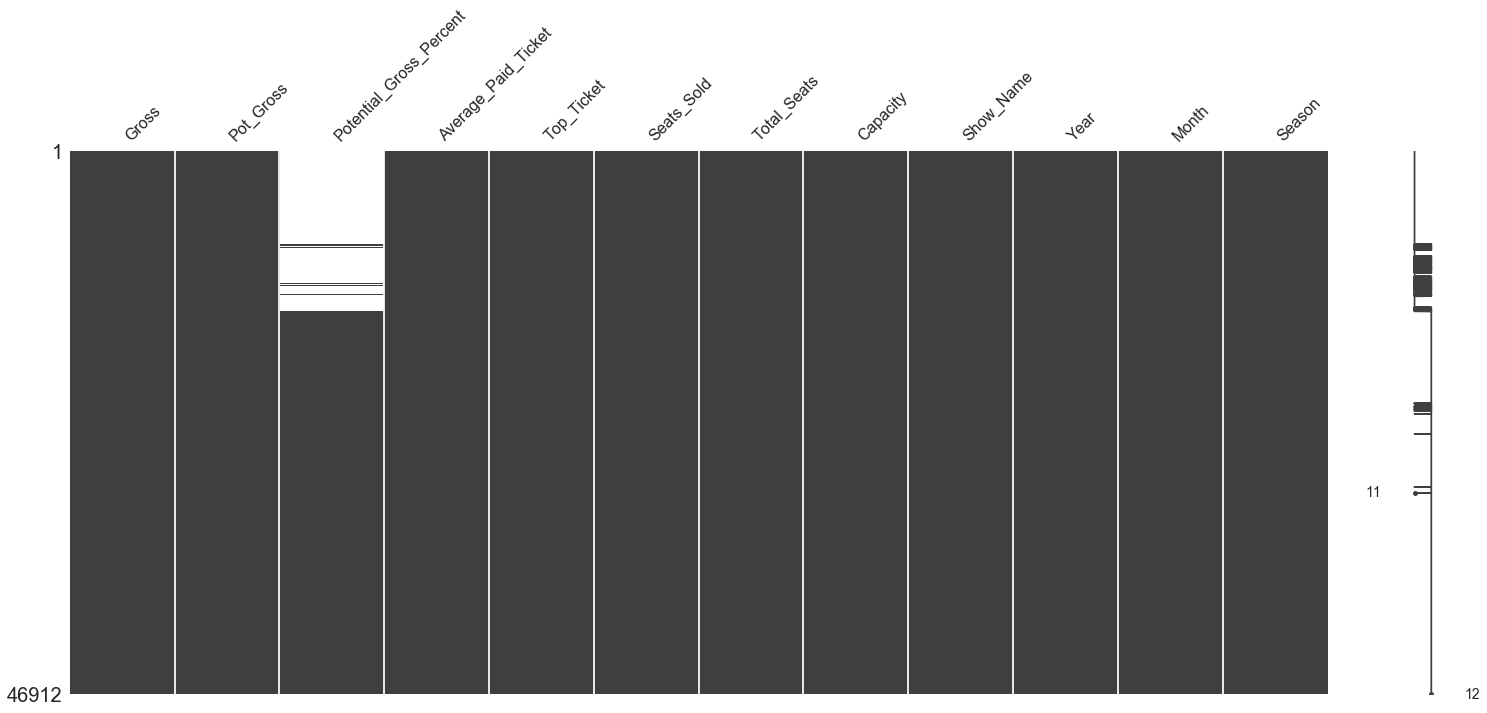

In [627]:
msno.matrix(broadway_gross.iloc[:,0:])

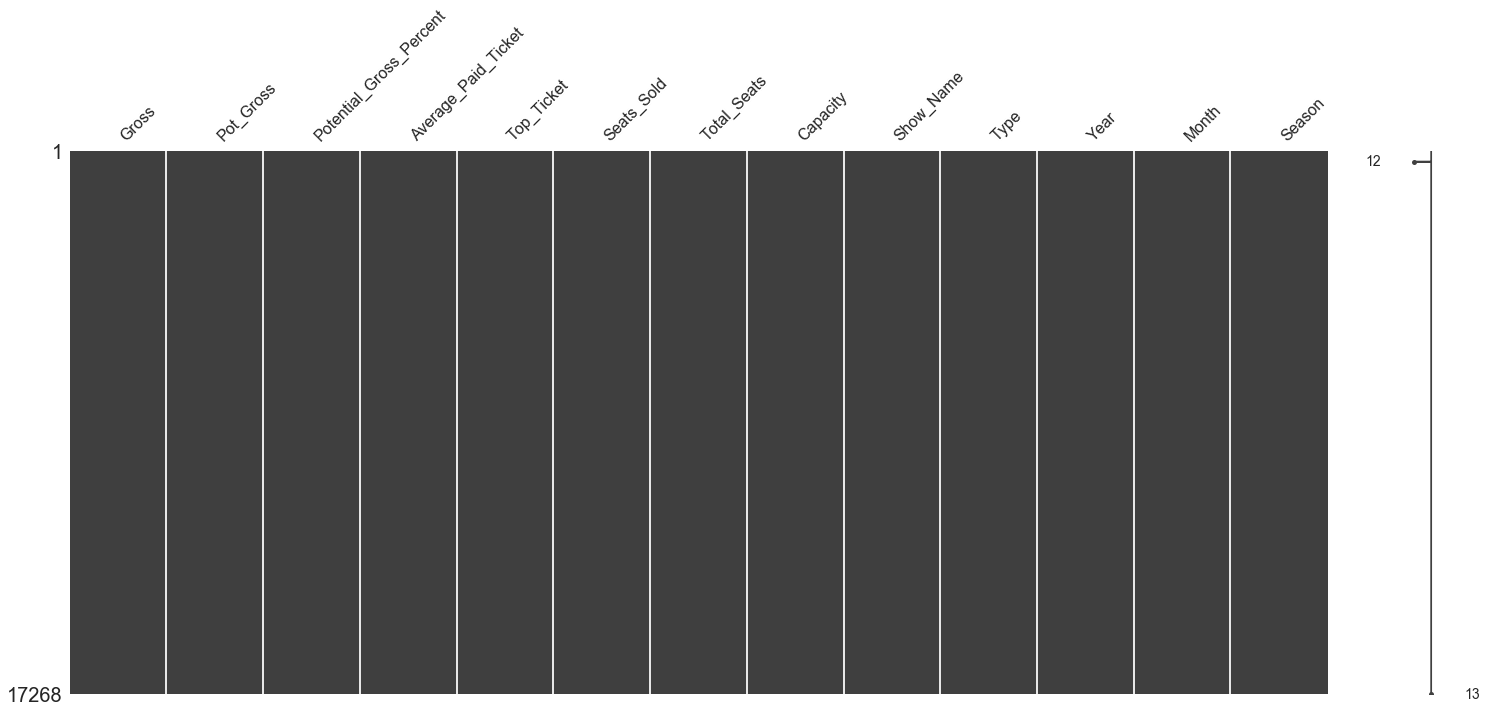

In [628]:
import missingno as msno
%matplotlib inline
msno.matrix(broadway_df.iloc[:,0:])

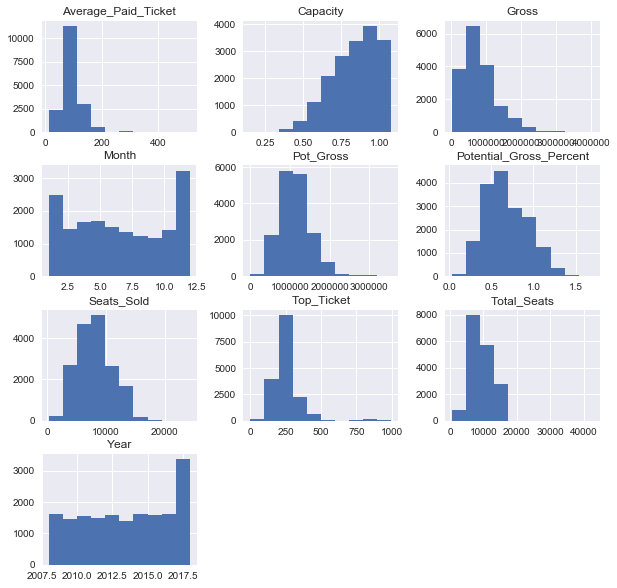

In [629]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
broadway_df.hist(ax = ax);

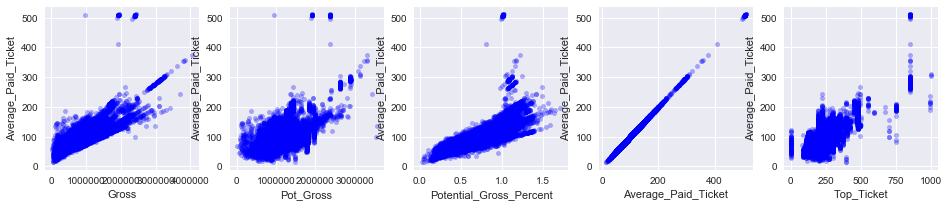

In [630]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(list(broadway_df)[0:], axes):
    broadway_df.plot(kind='scatter', x= xcol, y="Average_Paid_Ticket", ax=ax, alpha=0.3, color='b')

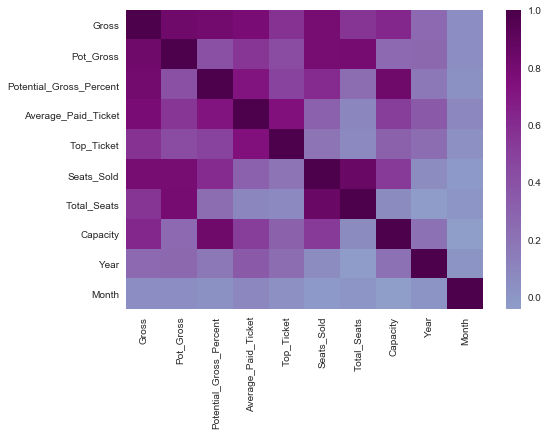

In [523]:
import seaborn as sns
sns.heatmap(broadway_df.corr(),cmap="BuPu", center=0);

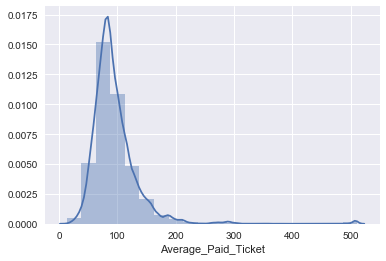

In [560]:
ax = sns.distplot(broadway_df['Average_Paid_Ticket'], bins=20)

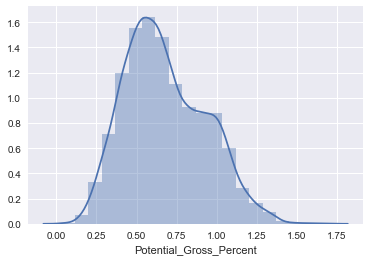

In [575]:
ax = sns.distplot(broadway_df['Potential_Gross_Percent'], bins=20)

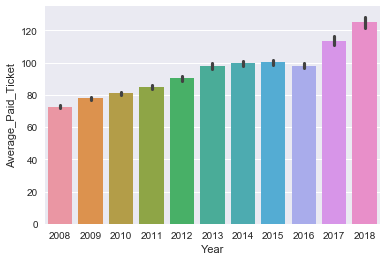

In [566]:
ax = sns.barplot(x="Year", y="Average_Paid_Ticket",data=broadway_df)

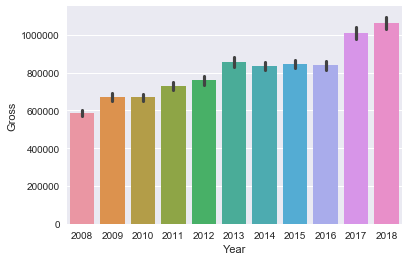

In [568]:
ax = sns.barplot(x="Year", y="Gross",data=broadway_df)

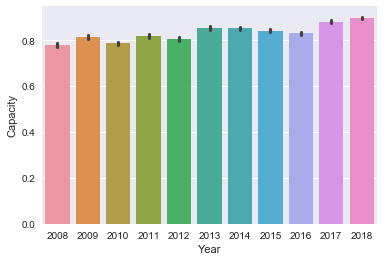

In [570]:
ax = sns.barplot(x="Year", y="Capacity",data=broadway_df)

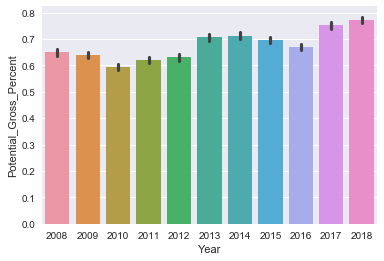

In [577]:
ax = sns.barplot(x="Year", y="Potential_Gross_Percent",data=broadway_df)

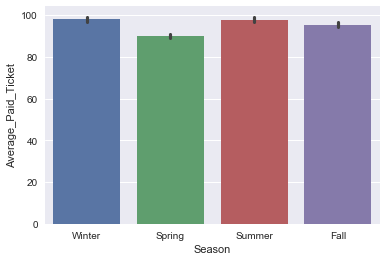

In [565]:
ax = sns.barplot(x="Season", y="Average_Paid_Ticket",data=broadway_df)

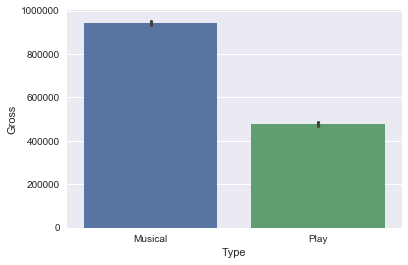

In [631]:
ax = sns.barplot(x="Type", y="Gross",data=broadway_df)

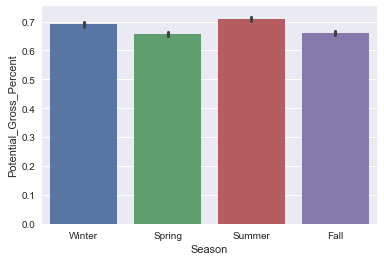

In [633]:
ax = sns.barplot(x="Season", y="Potential_Gross_Percent",data=broadway_df)

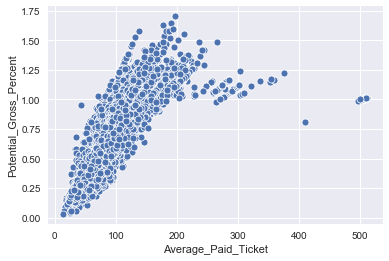

In [581]:
ax = sns.scatterplot(x="Average_Paid_Ticket", y="Potential_Gross_Percent", data=broadway_df)

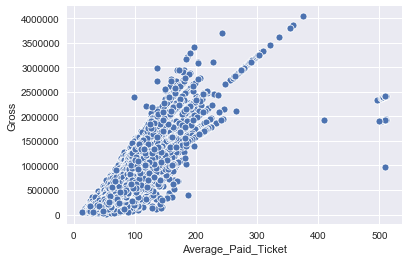

In [582]:
ax = sns.scatterplot(x="Average_Paid_Ticket", y="Gross", data=broadway_df)

In [634]:
broadway_df.corr()

Gross  Pot_Gross  Potential_Gross_Percent  \
Gross                    1.000000   0.826644                 0.815853   
Pot_Gross                0.826644   1.000000                 0.412940   
Potential_Gross_Percent  0.815853   0.412940                 1.000000   
Average_Paid_Ticket      0.780614   0.551113                 0.723436   
Top_Ticket               0.572648   0.437010                 0.490230   
Seats_Sold               0.790263   0.791184                 0.606260   
Total_Seats              0.558226   0.797014                 0.242105   
Capacity                 0.628442   0.262322                 0.827550   
Year                     0.265331   0.275781                 0.177145   
Month                    0.048764   0.051572                 0.027418   

                         Average_Paid_Ticket  Top_Ticket  Seats_Sold  \
Gross                               0.780614    0.572648    0.790263   
Pot_Gross                           0.551113    0.437010    0.791184   
Potential_Gross_Percent             0.723436    0.490230    0.606260   
Average_Paid_Ticket                 1.000000    0.744617    0.317996   
Top_Ticket                          0.744617    1.000000    0.199010   
Seats_Sold                          0.317996    0.199010    1.000000   
Total_Seats                         0.091623    0.078388    0.862262   
Capacity                            0.522192    0.309823    0.538856   
Year                                0.353618    0.236127    0.060369   
Month                               0.080534    0.035347   -0.016220   

                         Total_Seats  Capacity      Year     Month  
Gross                       0.558226  0.628442  0.265331  0.048764  
Pot_Gross                   0.797014  0.262322  0.275781  0.051572  
Potential_Gross_Percent     0.242105  0.827550  0.177145  0.027418  
Average_Paid_Ticket         0.091623  0.522192  0.353618  0.080534  
Top_Ticket                  0.078388  0.309823  0.236127  0.035347  
Seats_Sold                  0.862262  0.538856  0.060369 -0.016220  
Total_Seats                 1.000000  0.066589 -0.034802  0.006415  
Capacity                    0.066589  1.000000  0.212051 -0.041524  
Year                       -0.034802  0.212051  1.000000  0.011763  
Month                       0.006415 -0.041524  0.011763  1.000000

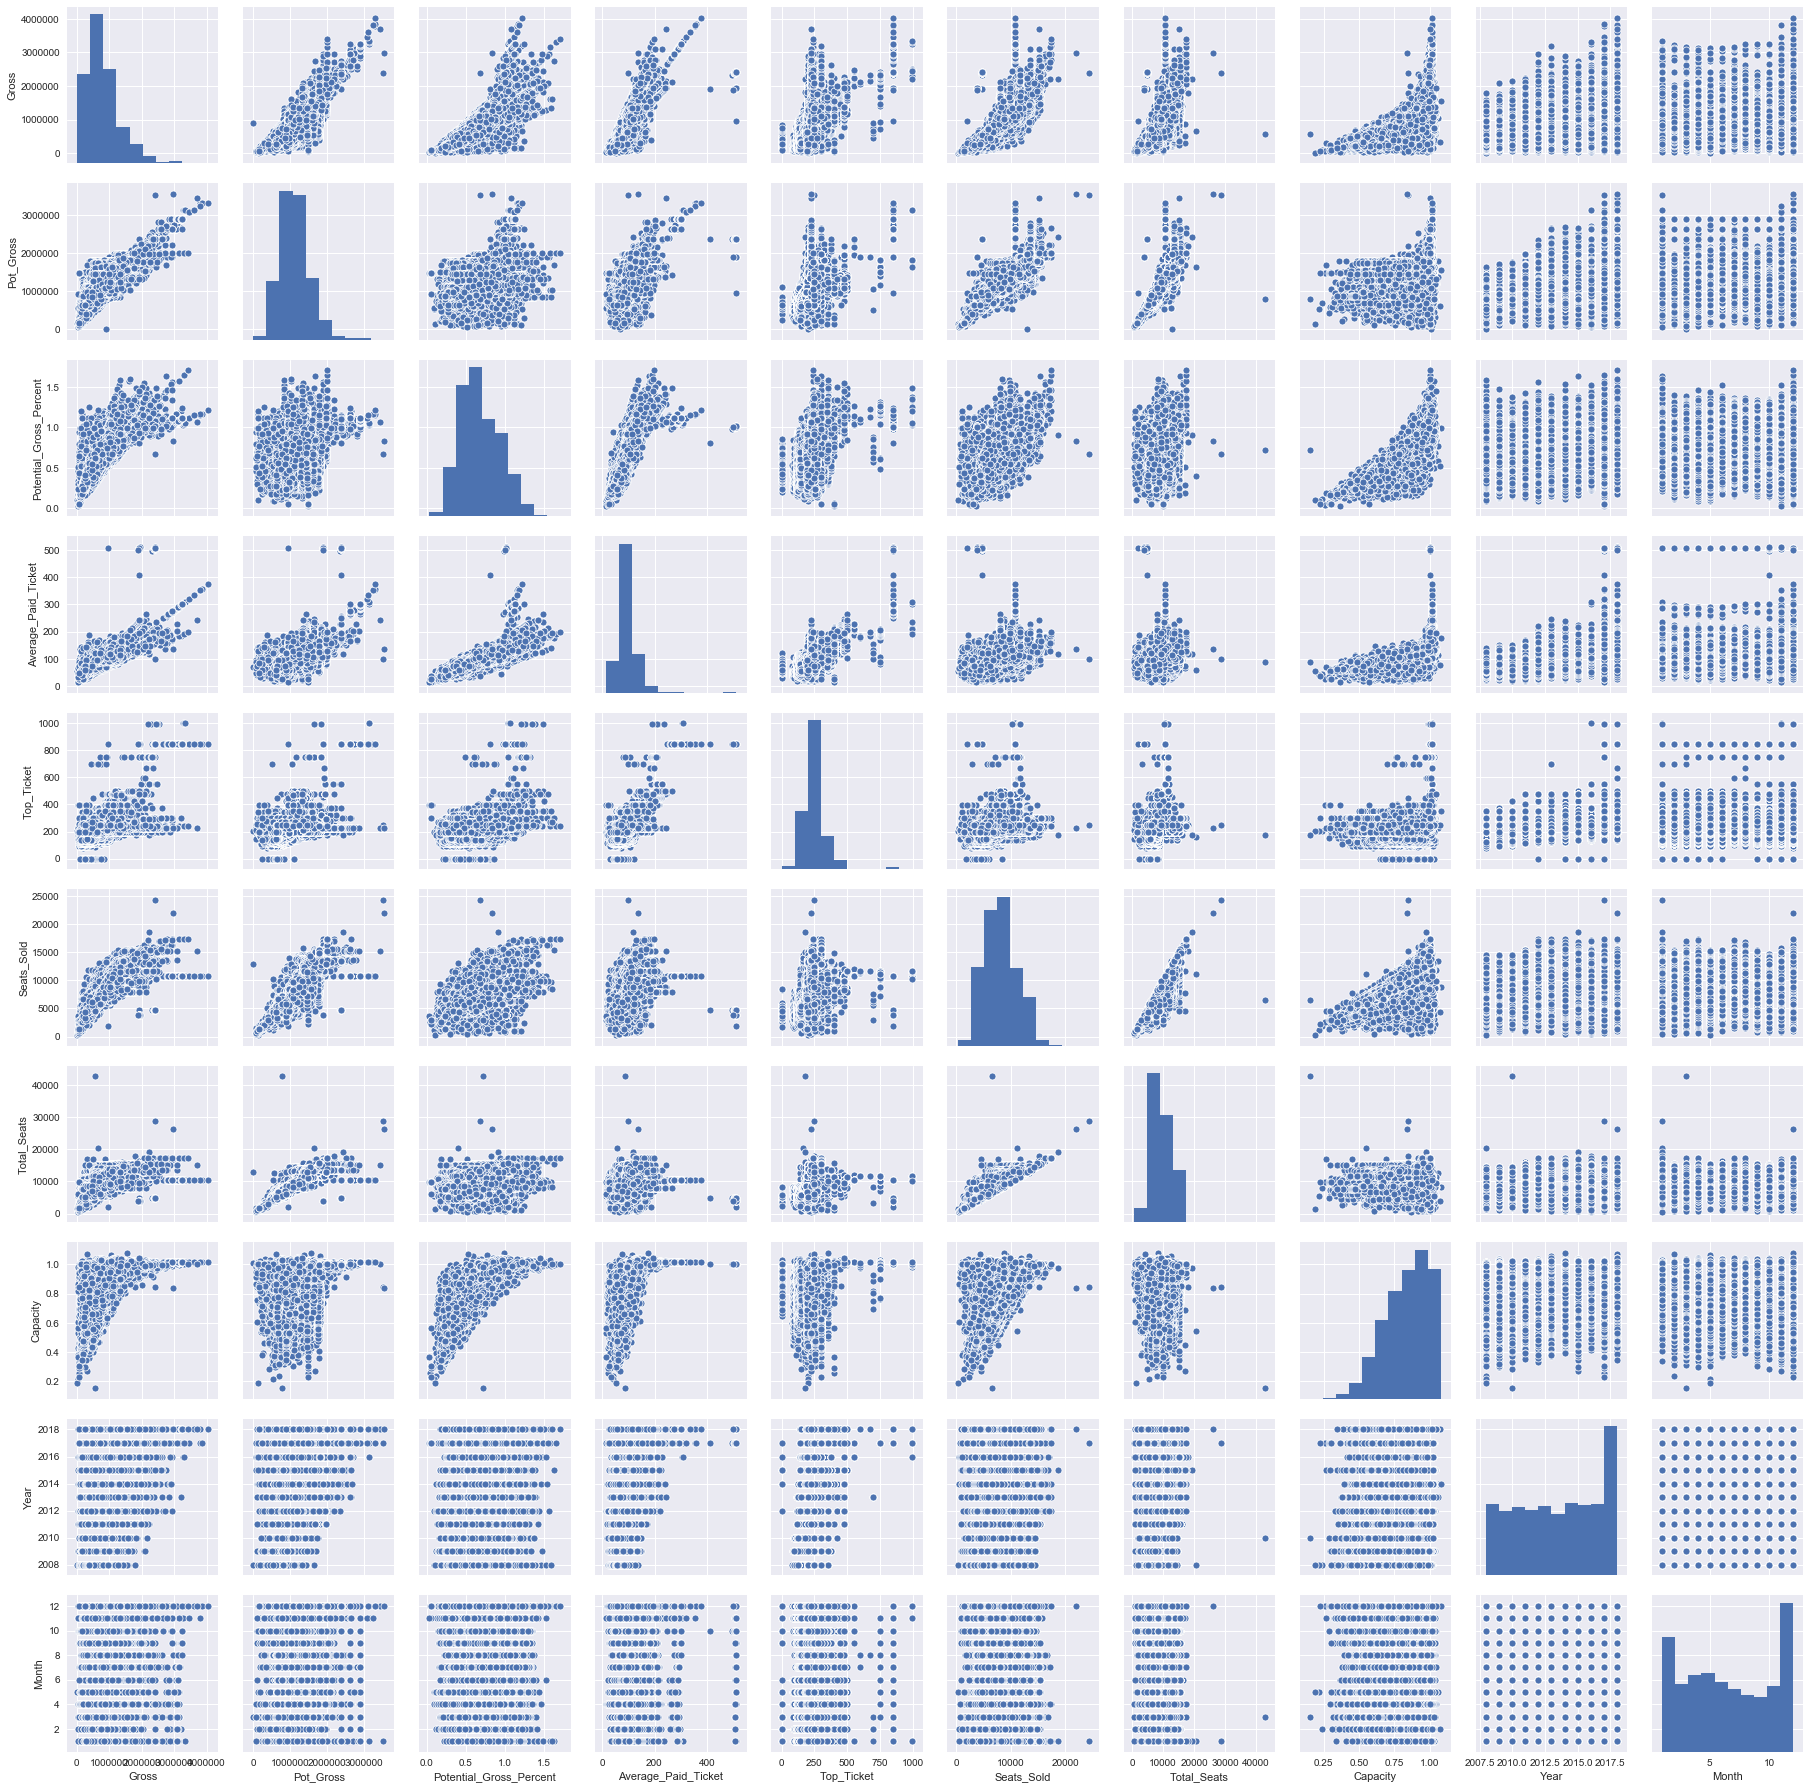

In [635]:
sns.pairplot(broadway_df)

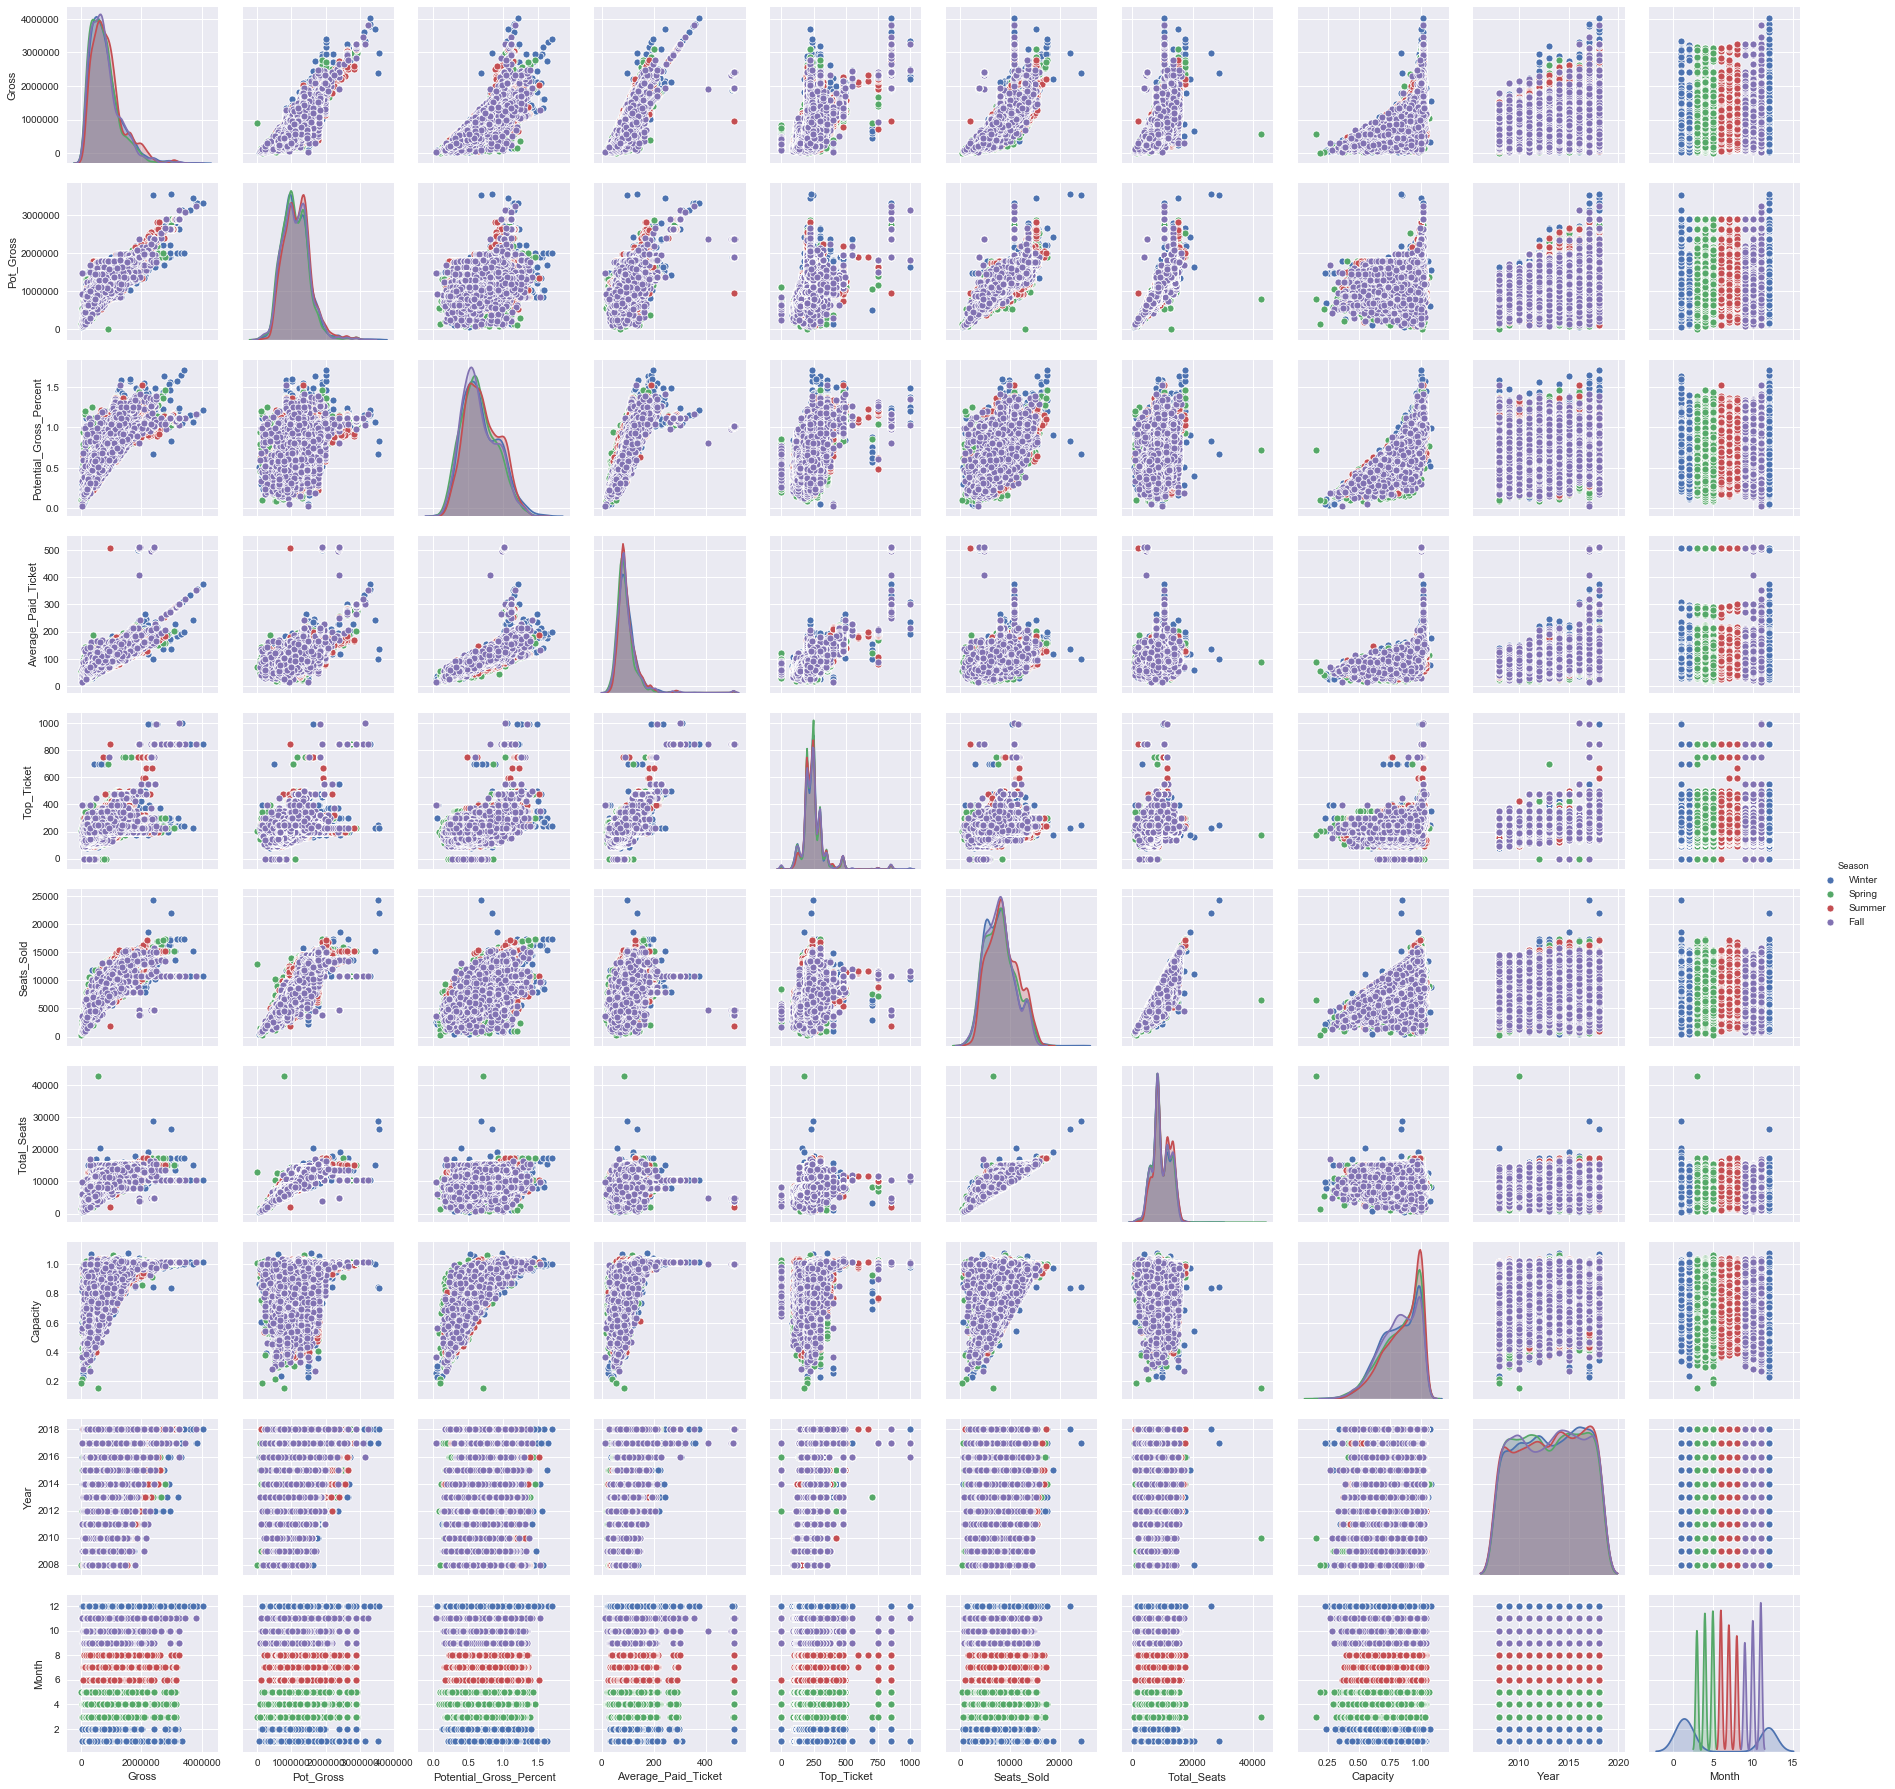

In [587]:
sns.pairplot(broadway_df,hue="Season")

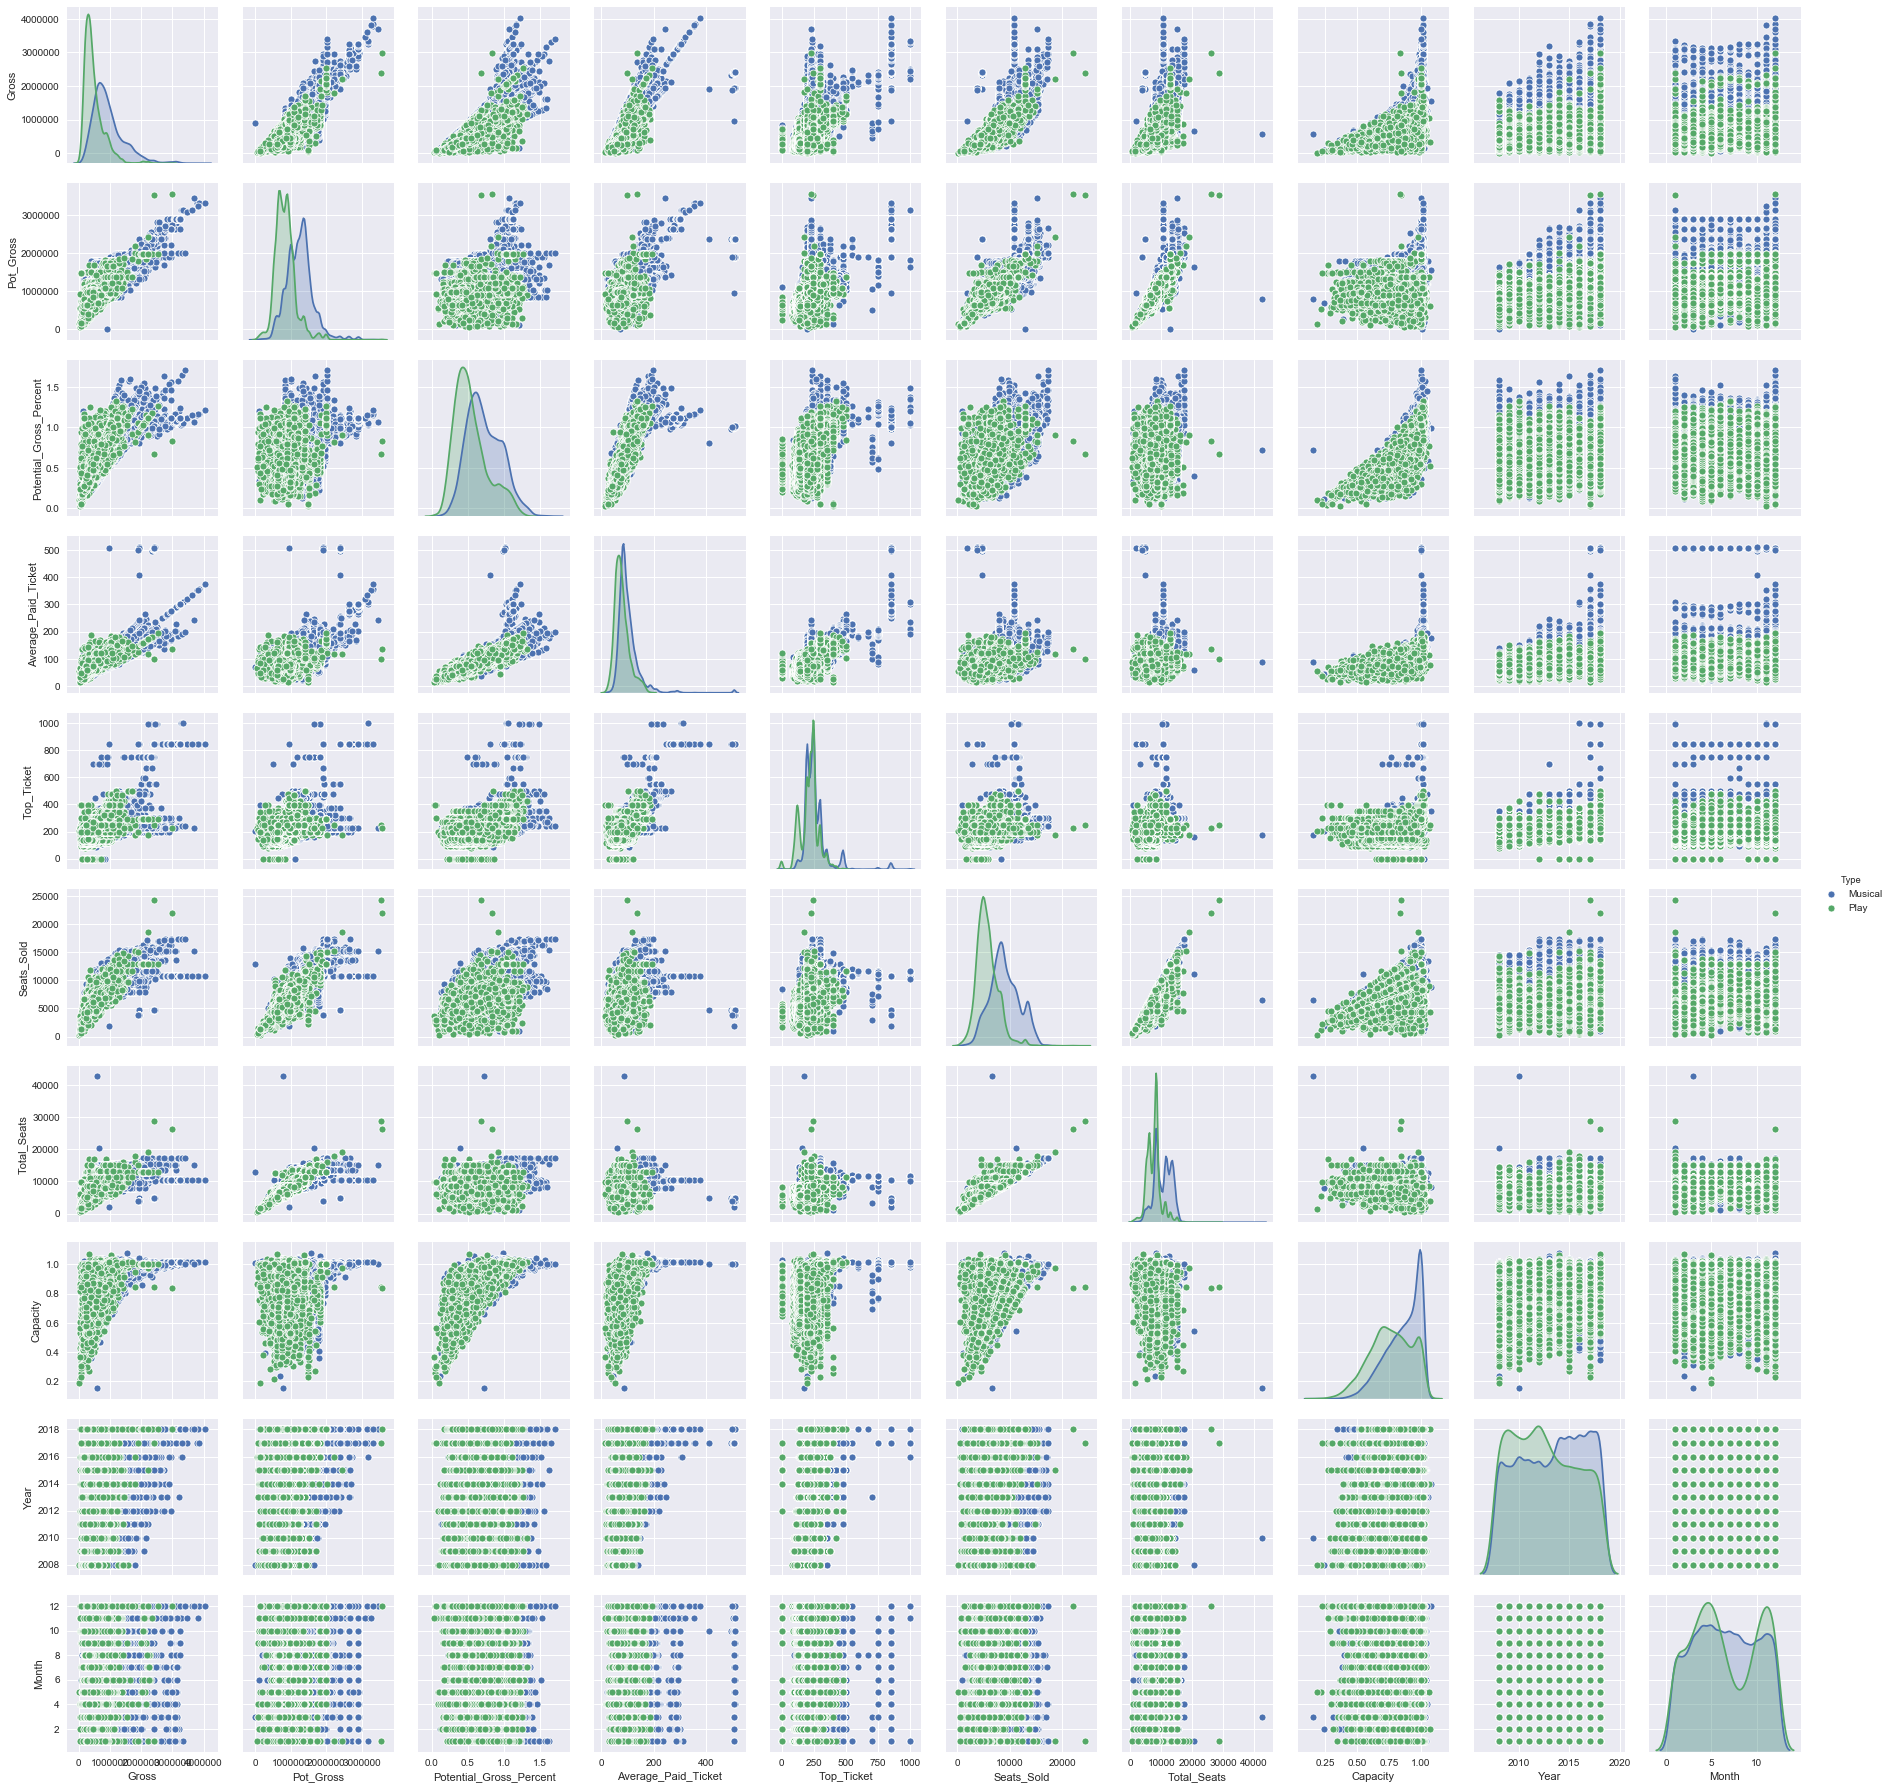

In [636]:
sns.pairplot(broadway_df,hue="Type")

In [591]:
broadway_df.head()

Gross  Pot_Gross  Potential_Gross_Percent  \
Week                                                        
2008-01-06   759972.0   919903.0                   0.8261   
2008-01-06   343967.0   672857.0                   0.5112   
2008-01-06   646678.0   801792.0                   0.8065   
2008-01-06   878076.0   853969.0                   1.0282   
2008-01-06  1130940.0  1036499.0                   1.0911   

            Average_Paid_Ticket  Top_Ticket  Seats_Sold  Total_Seats  \
Week                                                                   
2008-01-06                71.70      250.00       10599        13528   
2008-01-06                58.13      200.00        5917         8267   
2008-01-06                77.37      201.25        8358         8720   
2008-01-06                96.79      251.25        9072         8976   
2008-01-06                93.28      251.50       12124        12024   

            Capacity           Show_Name  Year  Month  Season  
Week                                                           
2008-01-06     0.783      Legally Blonde  2008      1  Winter  
2008-01-06     0.716                Rent  2008      1  Winter  
2008-01-06     0.958    Spring Awakening  2008      1  Winter  
2008-01-06     1.011      Les Mis Rables  2008      1  Winter  
2008-01-06     1.008  The Little Mermaid  2008      1  Winter

In [593]:
broadway_df.shape

(17268, 12)

In [595]:
broadway_gross.describe()

Gross     Pot_Gross  Potential_Gross_Percent  \
count  4.691200e+04  4.691200e+04             33339.000000   
mean   5.529906e+05  6.589295e+05                 0.680584   
std    4.273087e+05  5.437220e+05                 0.243813   
min    1.037000e+03  0.000000e+00                 0.029000   
25%    2.500030e+05  0.000000e+00                 0.500700   
50%    4.562905e+05  6.694900e+05                 0.657300   
75%    7.289208e+05  1.033311e+06                 0.855150   
max    4.041493e+06  3.559306e+06                 2.570500   

       Average_Paid_Ticket    Top_Ticket    Seats_Sold   Total_Seats  \
count         46912.000000  46912.000000  46912.000000  46912.000000   
mean             57.132996    139.353540   7882.826910   7378.559558   
std              46.114750    124.194466   3239.049246   5000.057395   
min               0.000000      0.000000     24.000000      0.000000   
25%               0.000000     45.000000   5384.750000   1635.750000   
50%              58.080000    100.000000   7714.000000   8376.000000   
75%              82.510000    240.000000  10194.000000  11496.000000   
max             511.580000    998.000000  93680.000000  55096.000000   

           Capacity          Year         Month  
count  46912.000000  46912.000000  46912.000000  
mean       0.613883   2002.956386      6.529310  
std        0.379177      9.885800      3.461115  
min        0.000000   1984.000000      1.000000  
25%        0.291750   1995.000000      4.000000  
50%        0.760000   2004.000000      6.000000  
75%        0.920000   2011.000000     10.000000  
max        2.774000   2019.000000     12.000000

In [638]:
broadway_df.head()

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972     919903                   0.8261                71.70   
1/6/08   343967     672857                   0.5112                58.13   
1/6/08   646678     801792                   0.8065                77.37   
1/6/08   878076     853969                   1.0282                96.79   
1/6/08  1130940    1036499                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

           Type  Year  Month  Season  
Week                                  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter

In [640]:
type_dummy = pd.get_dummies(broadway_df['Type'],prefix = 'Type')
type_dummy.tail(10)

Type_Musical  Type_Play
Week                             
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             0          1

In [641]:
season_dummy = pd.get_dummies(broadway_df['Season'],prefix = 'Season')
season_dummy.head()

Season_Fall  Season_Spring  Season_Summer  Season_Winter
Week                                                            
1/6/08            0              0              0              1
1/6/08            0              0              0              1
1/6/08            0              0              0              1
1/6/08            0              0              0              1
1/6/08            0              0              0              1

In [642]:
broadway_df_dummies = pd.concat([broadway_df, type_dummy, season_dummy], axis = 1) #combining along the columns
broadway_df_dummies.head()

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972     919903                   0.8261                71.70   
1/6/08   343967     672857                   0.5112                58.13   
1/6/08   646678     801792                   0.8065                77.37   
1/6/08   878076     853969                   1.0282                96.79   
1/6/08  1130940    1036499                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

           Type  Year  Month  Season  Type_Musical  Type_Play  Season_Fall  \
Week                                                                         
1/6/08  Musical  2008      1  Winter             1          0            0   
1/6/08  Musical  2008      1  Winter             1          0            0   
1/6/08  Musical  2008      1  Winter             1          0            0   
1/6/08  Musical  2008      1  Winter             1          0            0   
1/6/08  Musical  2008      1  Winter             1          0            0   

        Season_Spring  Season_Summer  Season_Winter  
Week                                                 
1/6/08              0              0              1  
1/6/08              0              0              1  
1/6/08              0              0              1  
1/6/08              0              0              1  
1/6/08              0              0              1

In [644]:
broadway_df_dummies=broadway_df_dummies.drop(columns=['Type','Month','Season'])

In [660]:
mlr_model = ols(formula='Capacity~Average_Paid_Ticket', data=broadway_df_dummies).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     6473.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:09:35   Log-Likelihood:                 10983.
No. Observations:               17268   AIC:                        -2.196e+04
Df Residuals:                   17266   BIC:                        -2.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6520      0.002    265.278      0.000       0.647       0.657
Average_Paid_Ticket     0.0019   2.37e-05     80.457      0.000       0.002       0.002
==============================================================================
Omnibus:                     2540.297   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4222.812
Skew:                          -0.993   Prob(JB):                         0.00
Kurtosis:                       4.389   Cond. No.                         261.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [662]:
mlr_model2 = ols(formula='Capacity~Average_Paid_Ticket+Top_Ticket+Total_Seats', data=broadway_df_dummies).fit()
mlr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     2318.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:09:51   Log-Likelihood:                 11156.
No. Observations:               17268   AIC:                        -2.230e+04
Df Residuals:                   17264   BIC:                        -2.227e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6660      0.004    164.868      0.000       0.658       0.674
Average_Paid_Ticket     0.0024   3.53e-05     67.713      0.000       0.002       0.002
Top_Ticket             -0.0003   1.51e-05    -18.467      0.000      -0.000      -0.000
Total_Seats          1.055e-06   3.29e-07      3.211      0.001    4.11e-07     1.7e-06
==============================================================================
Omnibus:                     2711.902   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4948.094
Skew:                          -1.002   Prob(JB):                         0.00
Kurtosis:                       4.691   Cond. No.                     4.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [663]:
mlr_model3 = ols(formula='Capacity~Average_Paid_Ticket+Top_Ticket+Total_Seats+Type_Musical+Season_Fall+Season_Spring+Season_Summer', data=broadway_df_dummies).fit()
mlr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     1209.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:10:06   Log-Likelihood:                 11678.
No. Observations:               17268   AIC:                        -2.334e+04
Df Residuals:                   17260   BIC:                        -2.328e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6628      0.004    154.094      0.000       0.654       0.671
Average_Paid_Ticket     0.0023   3.47e-05     65.434      0.000       0.002       0.002
Top_Ticket             -0.0003   1.47e-05    -20.403      0.000      -0.000      -0.000
Total_Seats         -3.589e-06   3.56e-07    -10.085      0.000   -4.29e-06   -2.89e-06
Type_Musical            0.0684      0.002     28.545      0.000       0.064       0.073
Season_Fall             0.0020      0.003      0.745      0.456      -0.003       0.007
Season_Spring           0.0288      0.003     10.979      0.000       0.024       0.034
Season_Summer           0.0297      0.003     10.918      0.000       0.024       0.035
==============================================================================
Omnibus:                     2540.104   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4653.801
Skew:                          -0.944   Prob(JB):                         0.00
Kurtosis:                       4.704   Cond. No.                     5.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [664]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [666]:
x=broadway_df_dummies[['Average_Paid_Ticket','Top_Ticket','Total_Seats','Type_Musical','Season_Fall','Season_Spring','Season_Summer']]
y=broadway_df_dummies.Capacity

sklearnmodel = LinearRegression(fit_intercept=True).fit(x, y)
r_squared = sklearnmodel.score(x, y)

# you may have to change the order of this based on your X data
predict = sklearnmodel.predict(np.array([[60, 100, 9000, 1, 1,0,0]])) 


print("Coefficients: ", sklearnmodel.coef_)
print("R2: ", r_squared)
print("Prediction: ", predict)

Coefficients:  [ 2.27113388e-03 -2.99456237e-04 -3.58946349e-06  6.83951279e-02
  2.01140037e-03  2.87878623e-02  2.97228282e-02]
R2:  0.3289250085345796
Prediction:  [0.80722837]
